In [5]:
import pymongo

db = pymongo.MongoClient('mongodb://127.0.0.1:27017')['radar']
col = db['release_metadata']
docs = col.find()

radar的metadata

- 思路1: metadata有优先级的, 前面的成功了就直接结束, 如果homepage, download_url这些匹配代码托管平台成功了, 就直接结束, 接着再看其他的code相关, 然后看bug相关, 最后看doc相关等等

- 思路2: 是根据分析结果调整metadata, badge等的权重, 粒度更细一些

- 并且可以定期统计, 动态调整 => 提高竞争力\卖点

[napari-svetlana](https://pypi.org/project/napari-svetlana/)以及[pubmed2pdf](https://pypi.org/project/pubmed2pdf/)的例子, Bug Tracker, User Support, Documentation也可以得到 ⇒ 直接在所有project_urls匹配得了?

首先需要对project_urls的field分布进行分析 => 还有哪些corner case? 还能有哪些好的field? 能不能试试性能不错的模糊匹配? 

In [6]:
project_url_field_counts = {}

for doc in docs:
    project_urls = doc["project_urls"]
    if isinstance(project_urls, dict):
        project_url_fields = project_urls.keys()
        for project_url_field in project_url_fields:
            project_url_field = project_url_field.lower().replace(' ', '_').replace('-', '_')
            if project_url_field in project_url_field_counts:
                project_url_field_counts[project_url_field] += 1
            else:
                project_url_field_counts[project_url_field] = 1
    
project_url_field_counts = sorted(project_url_field_counts.items(), key=lambda x: x[1], reverse=True)
project_url_field_counts = {item[0]: item[1] for item in project_url_field_counts}
print(project_url_field_counts)

{'homepage': 3762399, 'download': 777089, 'source': 398666, 'documentation': 361679, 'tracker': 178122, 'repository': 158933, 'bug_tracker': 153083, 'source_code': 69892, 'bug_reports': 37100, 'issue_tracker': 31179, 'changelog': 27114, 'issues': 17667, 'funding': 12468, 'github': 10969, 'code': 9427, 'twitter': 6650, 'contribute!': 6209, 'forum': 6201, 'say_thanks!': 5036, 'home': 4914, 'website': 4192, 'discord': 4060, 'pypi': 3552, 'changes': 3226, 'chat': 2654, 'ci': 2595, 'youtube': 2513, 'docs': 2160, 'blog': 1920, 'release_notes': 1910, 'slack_chat': 1845, 'slack': 1778, 'gitter': 1682, 'discussions': 1665, 'user_support': 1599, 'github:_repo': 1405, 'github:_issues': 1384, 'releases': 1348, 'dev_docs': 1324, 'community': 1215, 'change_log': 1046, 'wiki': 980, 'docker': 938, 'donate': 893, 'icon': 888, 'examples': 875, 'docs:_rtd': 869, 'read_the_docs': 678, 'code_of_conduct': 677, 'mailing_lists': 651, 'sources': 638, 'support': 611, 'github_repository': 595, 'home_page': 528, 

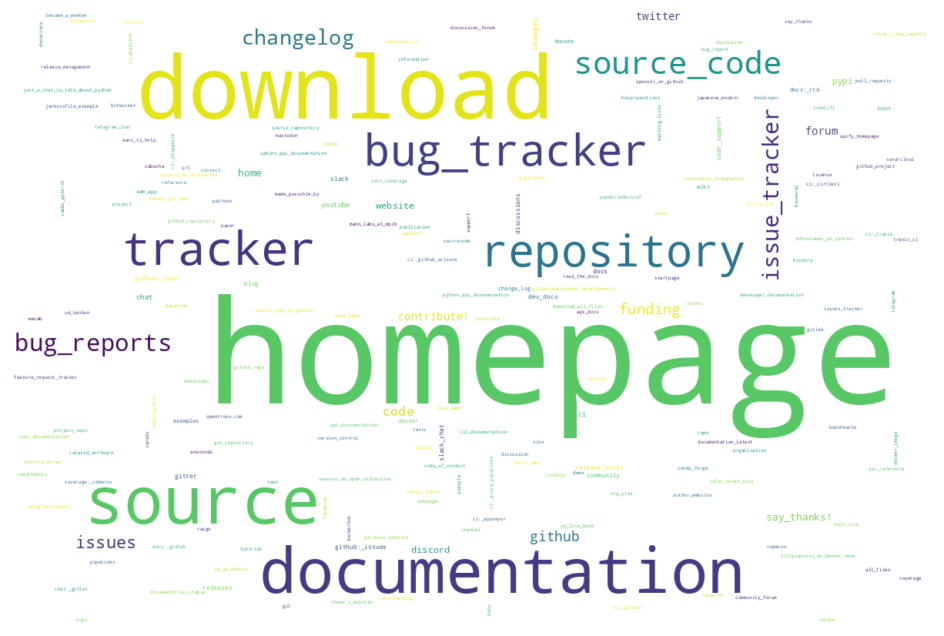

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=1200, height=800, background_color="white").generate_from_frequencies(project_url_field_counts)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off")
plt.show()

bug tracker等field的url匹配包含代码托管平台关键词, 随机抽一部分, 人工看看结果如何, 排个优先级